# sub-n-classes, Tsallis Entropy labelling

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
import time
from random import *

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
def randints_nodup(k):
    ns = []
    while (len(ns) < k):
        n = randint(0, 9)
        if not n in ns:
            ns.append(n)
    return list(ns)

In [3]:
# entropy labelling
def tsallis_label(q, probas, s_cls):
    elements = np.power(probas, q - 1)
    # thrshld in tsallis entropy model
    ts_thrshld = np.sum(np.power(probas, q))
    if q < 1:
        labels = [s_cls[i] for i, e in enumerate(elements) if e <= ts_thrshld]
    else:
        labels = [s_cls[i] for i, e in enumerate(elements) if e >= ts_thrshld]
    return labels

In [4]:
def flip_label(pair, label):
    p_list = list(pair)
    flipped = [c for c in p_list if (c != label)]
    return flipped[0]

In [5]:
def flip_cond():
    r = random()
    if r <= 0.25:
        return True
    else:
        return False

#### ラベルづけからその正解率の評価まで行う関数

In [27]:
# labelling and evaluating them
def tsallis_ncls_eval(q, classes_num, orig_A, lim_A):
    s_cls = randints_nodup(classes_num)
    s_cls.sort()
    print(s_cls)
    
    # confusing pairs
    conf_pairs = [{0, 9}, {1,7}, {3, 8}, {4, 6}]
    
    # extracting samples of the chosen classes
    trn_imgs = [img for i, img in enumerate(train_imgs) if train_labels[i] in s_cls]
    trn_labels = [label for label in train_labels if label in s_cls]
    # flip some labels
    flip_flags = [True if c_pair < set(s_cls) else False for c_pair in conf_pairs]
    
    for i, label in enumerate(trn_labels):
        for j, flag in enumerate(flip_flags):
            if (flag and flip_cond() and label in conf_pairs[j]):
                trn_labels[i] = flip_label(conf_pairs[j], label)
    
    # generate an annotator
    a1_model = LR().fit(trn_imgs[:orig_A], trn_labels[:orig_A])
    a1_proba = a1_model.predict_proba(trn_imgs[orig_A:orig_A + lim_A])

    return s_cls, a1_proba[:4]

## MNIST

In [11]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_imgs = np.array([x.ravel() for x in train_images])
test_imgs = np.array([y.ravel() for y in test_images])

img_SIZE = train_images.shape[1]*train_images.shape[2]

### labels evaluation

10 classes
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.82273981e-001 1.50167672e-115 1.20806563e-006 1.34094353e-030
 1.22891787e-015 7.01642951e-009 2.61682506e-011 5.88520037e-052
 9.38092598e-013 8.17724804e-001]


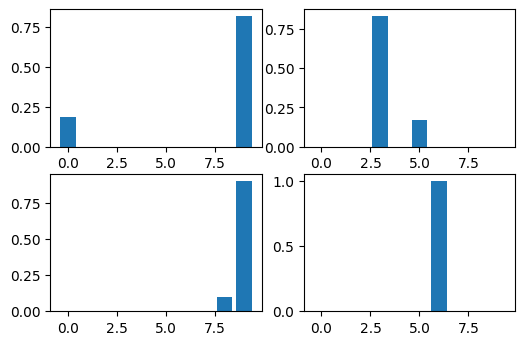

In [33]:
for classes_num in range(10, 11):
    print(f"{classes_num} classes")
    orig_A1, lim_A1 = 2000, 2000
    q = 0.99
    s_cls, probas = tsallis_ncls_eval(q, classes_num, orig_A1, lim_A1)
    fig = plt.figure(dpi = 100)
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    
    ax1.bar(s_cls, probas[0])
    ax2.bar(s_cls, probas[1])
    ax3.bar(s_cls, probas[2])
    ax4.bar(s_cls, probas[3])